<h2>MNIST dataset in Keras library</h2>

<h2>Load data</h2>

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import time

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Using TensorFlow backend.


Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [2]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


<h2>Build Linear model</h2>

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Create Linear Softmax model
model = Sequential()
model.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

<h2>Train and evaluate Linear model on test data</h2>

In [4]:
# Start timer
start = time.time()

# Train model on training data
model.fit(X_train_1D, y_train, batch_size=100, epochs=5, verbose=1)
# Evaluate model on test data
score = model.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.6391 - acc: 0.8388
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3477 - acc: 0.9052
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3103 - acc: 0.9138
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2929 - acc: 0.9185
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2821 - acc: 0.9214

Test Accuracy: 92.39%
Time elapsed: 5.18 sec


<h2>Build Neural Net model</h2>

In [5]:
# Create Neural Net Softmax model
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

<h2>Train and evaluate Neural Net model on test data</h2>

In [6]:
# Start timer
start = time.time()

# Train model on training data
model.fit(X_train_1D, y_train, batch_size=100, epochs=5, verbose=1)
# Evaluate model on test data
score = model.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2912 - acc: 0.9181
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1229 - acc: 0.9650
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0834 - acc: 0.9760
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0620 - acc: 0.9821
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0478 - acc: 0.9861

Test Accuracy: 97.61%
Time elapsed: 16.34 sec


<h2>Build ConvNet model</h2>

In [4]:
from keras.layers import Dropout, Flatten, Convolution2D, MaxPooling2D

# Create ConvNet model
model = Sequential()
# - Conv layers
model.add(Convolution2D(32, (5,5), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2))) #reduces size to 14x14
model.add(Convolution2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #reduces size to 7x7
# - Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
        
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

<h2>Train and evaluate ConvNet model on test data</h2>

In [8]:
# Start timer
start = time.time()

# Train model on training data
model.fit(X_train_2D, y_train, batch_size=128, epochs=5, verbose=1)
# Evaluate model on test data
score = model.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/5
60000/60000 [==============================] - 46s 771us/step - loss: 0.2197 - acc: 0.9330
Epoch 2/5
60000/60000 [==============================] - 47s 775us/step - loss: 0.0572 - acc: 0.9823
Epoch 3/5
60000/60000 [==============================] - 45s 749us/step - loss: 0.0411 - acc: 0.9874
Epoch 4/5
60000/60000 [==============================] - 46s 765us/step - loss: 0.0316 - acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 43s 721us/step - loss: 0.0269 - acc: 0.9915

Test Accuracy: 99.28%
Time elapsed: 229.75 sec


<h2>Use early stopping when training the model</h2>
See example <a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/">here</a>.

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 36s 755us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0362 - val_acc: 0.9898
Epoch 2/8
48000/48000 [==============================] - 37s 765us/step - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0327 - val_acc: 0.9903
Epoch 3/8
48000/48000 [==============================] - 36s 758us/step - loss: 0.0200 - acc: 0.9939 - val_loss: 0.0321 - val_acc: 0.9901
Epoch 00003: early stopping

Test Accuracy: 99.40%
Time elapsed: 111.75 sec


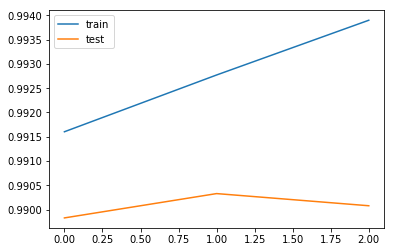

In [9]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

# Start timer
start = time.time()

# Define early stopping callback
# patience=n -> stop when loss is not improved for n epochs
# baseline=0.n -> stop when loss is below threshold 0.n
# min_delta=n -> stop when improvement is less than n between two epochs
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, min_delta=0.00001)

# Train model on training data
# Note: uses 20% of the training set for validation
# Training is stopped when validation error falls beyond a threshold
history = model.fit(X_train_2D, y_train, batch_size=256, epochs=8, validation_split=0.2, callbacks=[es], verbose=1)
# Evaluate model on test data
score = model.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

<h2>Confusion matrix</h2>

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1133    0    0    0    1    0    1    0    0]
 [   0    1 1027    0    0    0    0    3    1    0]
 [   0    0    0 1005    0    3    0    1    1    0]
 [   0    0    0    0  977    0    0    0    2    3]
 [   2    0    0    3    0  885    1    1    0    0]
 [   2    2    0    0    1    1  952    0    0    0]
 [   0    1    0    1    0    0    0 1024    1    1]
 [   1    0    2    0    0    0    1    0  968    2]
 [   0    2    0    0    7    3    1    2    1  993]]


<h2>Plot examples</h2>

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


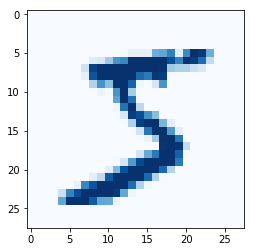

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


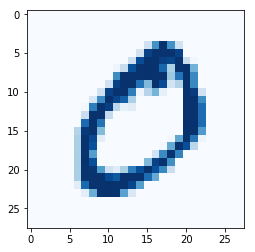

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


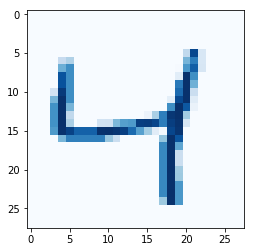

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


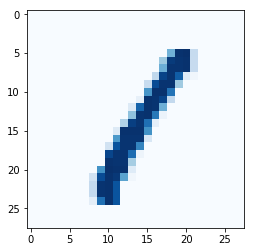

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


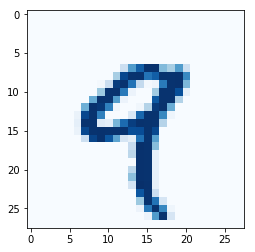

In [10]:
from matplotlib import pyplot as plt

# Plot 5 first images
for i in range(5):
    print("Label: {}".format(y_train[i]))
    plt.imshow(X_train[i], cmap=plt.cm.Blues)
    plt.show()